In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

diabetes = datasets.load_diabetes()




In [2]:
dframe = pd.DataFrame(diabetes.data)
#dframe.columns = diabetes.feature_names
dframe.columns = "age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"
dframe["y"] = diabetes.target
print(dframe.head())


        age       sex       bmi       map        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu      y  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0  


In [3]:
#get BMI data and modificate it to ndarray
diabetes_X = diabetes.data[:,np.newaxis,8]
#print(diabetes_X)
#diabetes_X_panda = dframe["bmi"]
#print(np.reshape(diabetes_X_panda.values,[diabetes_X_panda.values.shape[0],1]).shape)

#split data into training/test
diabetes_X_train = diabetes_X[:-40]
diabetes_X_test = diabetes_X[-40:]
diabetes_Y_train = diabetes.target[:-40]
diabetes_Y_test = diabetes.target[-40:]

#create model
regre = linear_model.LinearRegression()

#Train model
regre.fit(diabetes_X_train, diabetes_Y_train)

#Make predictions using the test data
diabetes_y_pred = regre.predict(diabetes_X_test)

#coefficients
#回帰係数。y=ax+bのaにあたる
print("Coefficiens:",regre.coef_)

#Mean Squared Error
#平均二乗誤差。小さければ性能が良い。
print("Mean Squared Error:",mean_squared_error(diabetes_Y_test,diabetes_y_pred))

#R^2
#決定係数。１に近いほど性能が良い。
print("R^2:",r2_score(diabetes_Y_test,diabetes_y_pred))

Coefficiens: [899.53962949]
Mean Squared Error: 3566.7464895621442
R^2: 0.3763169172509361


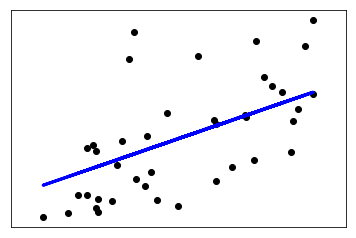

In [4]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_Y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()